In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
!pip install lightning
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

<Axes: xlabel='None', ylabel='None'>

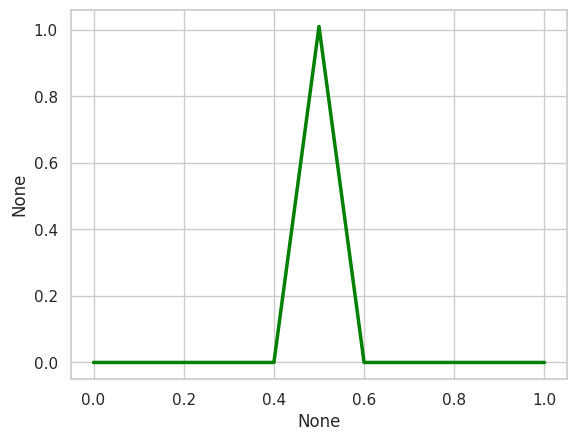

In [3]:
class BasicLightning(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad = False) # requires_grad means whether requires backpropagation for optimisation
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad = False) # nn.Parameter makes them part of a neural network
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad = False)
    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad = False)
    self.final_bias = nn.Parameter(torch.tensor(-16.0),requires_grad = False)

  def forward(self,input):
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11
    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)
    return output

input_doses = torch.linspace(0.,1.,11)
model = BasicLightning()
output_doses = model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_doses,color='green',linewidth=2.5)

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training e

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.002137962089502232
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.002137962089502232
INFO: Restoring states from the checkpoint path at /content/.lr_find_c57f4756-e3b8-4540-a3ef-d267c306731c.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_c57f4756-e3b8-4540-a3ef-d267c306731c.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_c57f4756-e3b8-4540-a3ef-d267c306731c.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_c57f4756-e3b8-4540-a3ef-d267c306731c.ckpt
INFO: 
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 7      | n/a 
---------------------------------------------
1         Trainable params
6     

new_lr suggests 0.002137962089502232 learning rate


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=34` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=34` reached.


tensor(-2.1706)


<Axes: >

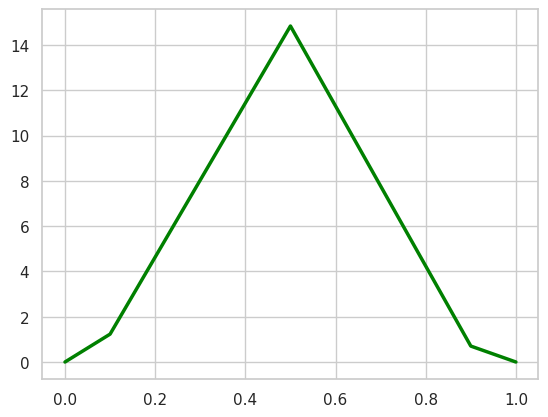

In [6]:
from lightning.pytorch.tuner import Tuner
class BasicLightningTrain(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad = False) # requires_grad means whether requires backpropagation for optimisation
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad = False) # nn.Parameter makes them part of a neural network
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad = False)
    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad = False)
    self.final_bias = nn.Parameter(torch.tensor(0.0),requires_grad = True)
    self.learning_rate = 0.01

  def forward(self,input):
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11
    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)
    return output
  def configure_optimizers(self):
    return SGD(self.parameters(),self.learning_rate)
  def training_step(self,batch,batch_idx):
    input_i , label_i = batch # batch and batch index obtained from dataloader
    output_i = self.forward(input_i)
    loss = (output_i - label_i)**2
    return loss

inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([0.,1.,0.])
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)
# dataloaders are very useful if we have large data because of 1) easy to access data in batches
# 2) easy to shuffle the data each epoch 3) easy to use a relatively small fraction of data for a quick training or debugging
model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=34) # From previously known without lightning
# used to find a good value for the learning rate for future training and optimization .lightning lets us add additional epochs to max if we want more
tuner = Tuner(trainer)
lr_find_results = tuner.lr_find(model,train_dataloaders = dataloader,min_lr = 0.001,max_lr = 1.0,early_stop_threshold=None)
# Training data in the dataloader, minimum and maximum learning rate,early_stop_threshold says that don't stop early
new_lr = lr_find_results.suggestion()
print(f"new_lr suggests {new_lr} learning rate")
model.learning_rate = new_lr
trainer.fit(model,train_dataloaders=dataloader)
# automatically calls configure_optimizers and training_step functions by including loss.backward() , optimizer.step() and optimizer.zero_grad() at right places
print(model.final_bias.data)
output_doses = model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses.detach().numpy(),y=output_doses.detach().numpy(),color='green',linewidth=2.5)